# SD212: Graph mining
## Exam

First complete the following text cell with your name:

**Name:** Reme Raphael

The duration of the exam is **3h**.

You must upload your notebook on the pedagogical size **before 4:30pm**.<br>
After **4:35pm**, there will be a penalty of **1 point per minute**.

There are 3 parts:
1. **Graph sampling** (5 points)
2. **Graph pruning** (5 points)
3. **Clustering by PageRank** (10 points)

Total = 20 points

The answer to each question must consist of:
* a text cell with your answer written either in **French** or in **English**,
* a code cell showing the **code** used to get the answer; this code must be running, without errors.

Useless code **must** be deleted.

Access to documents, slides and notebooks of the course is allowed.

Access to the Internet is **not** allowed (except for the pedagogical site).<br>

**Any** form of communication between students is strictly forbidden.

## Import

In [1]:
import networkx as nx

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib notebook

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Set colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

**Hint:** To get the documentation on a `function` you can type `function?`

In [ ]:
nx.pagerank?

## Data

You will need the following datasets (the same as in the labs, no need to download them again):
* **Les Misérables**<br>  Graph connecting the characters of the novel of Victor Hugo when they appear in the same chapter. The graph is undirected and weighted. Weights correspond to the number of chapters in which characters appear together. 
* **Openflights**<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. 

If you don't have these datasets in your working directory, you can download them from the pedagogical site.

In [7]:
miserables = nx.read_graphml("miserables.graphml", node_type = int)

In [8]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

To get the index of a node from its name, you may use the following:

In [9]:
graph = miserables.copy()
name = nx.get_node_attributes(miserables, 'name')

In [10]:
word = 'jean'
selected_nodes = {i: name[i] for i in name if name[i].find(word) >= 0}

In [11]:
selected_nodes

{11: 'Valjean'}

## 1. Graph sampling (5 points)

We first consider the graph Les Misérables.

In [56]:
graph = miserables.copy()

### Question 1.a

What are the 5 nodes of highest degree?<br>
Give the names of the characters.

**Your answer:**



In [169]:
degrees = dict(miserables.degree)
func_name = lambda x: name[x]

print("5 nodes of highest degree :")
nodes = sorted(degrees, key = lambda x: degrees[x], reverse = True)[:5]
print(list(map(func_name, nodes)))

5 nodes of highest degree :
['Valjean', 'Gavroche', 'Marius', 'Javert', 'Thenardier']


### Question 1.b

How many nodes have degree 2?<br>
Give the names of the characters.

**Your answer:**



In [170]:
nodes = []
for node in miserables:
    if degrees[node] == 2:
        nodes.append(node)

print("Nodes having degree 2 :", len(nodes))
print(list(map(func_name, nodes)))

Nodes having degree 2 : 10
['Marguerite', 'Perpetue', 'Woman1', 'MotherInnocent', 'Mme Burgon', 'Magnon', 'Mme Pontmercy', 'Baroness', 'Child1', 'Child2']


### Question 1.c

Give the exact probabilities of sampling Cosette under:
* uniform node sampling
* uniform edge sampling (i.e., a random end of an edge, the edge being chosen uniformly at random)
* weighted edge sampling (i.e., a random end of an edge, the edge being chosen in proportion to the weights)

Interpret the results.

**Your answer:**



Si on choisi un noeud au hasard et uniformément (Cosette par exemple), on a 1 chance sur le nombre de noeud : c'est à dire $\frac{1}{n}$

In [168]:
print("Uniform node sampling :", 1/len(miserables.nodes))

Uniform node sampling : 0.012987012987012988


Ici c'est plus compliqué : On choisit deux sommets X et Y avec une probabilité 1/m si il existe une arête entre les deux et 0 sinon. Puis on choisit un de ses sommets uniforméments. (1/2)

Pour choisir un sommet X il faut donc d'abord avoir choisi une des arêtes ayant comme bout X, puis avoir choisi X.

On a donc $d_X$ arêtes valables sur m possibles. Puis on tire le bout avec une probabilité 1/2.

Donc la probabilité de choisir un sommet précis X est $ \frac{d_X}{2m}$




Demonstration plus mathématique : Posons $X$ la VAR correspondant au sommet choisi. Et $A$ et $B$ les VAR correspondant à l'arête choisie. Alors on a donc pour $i,j,k \in V$ $P(X=k|A=i,\, B=j) = \frac{1}{2} \delta_{k\in \{i,j\}}$ (Une chance sur deux si le sommet a été choisi). De plus, $P(A=i,\, B=j) = \frac{1}{m} \delta_{i<->j}$ (Une chance sur m si l'arête existe)

Donc on peut écire : $P(X = k) = \sum_{i,j \in V} P(X=k|A=i,\, B=j)P(A=i,\, B=j) = \frac{1}{2m} \sum_{i,j \in V} \delta_{i<->j}\delta_{k\in \{i,j\}}$.

Par symétrie de i et j, $\delta_{k\in \{i,j\}}$ revient à fixer $i = k$ dans la somme. Donc $P(X = k) = \frac{1}{2m} \sum_{j \in V}\delta_{k<->j} = \frac{d_k}{2m}$ 


In [171]:
word = 'Cosette'
print({i: name[i] for i in name if name[i].find(word) >= 0})

{26: 'Cosette'}


In [172]:
print("Uniform edge sampling :", degrees[26]/len(miserables.edges)/2)

Uniform edge sampling : 0.021653543307086614


Ici de même au lieu de raisonner avec des poids de 1, on a des poids donnés et différents.

Si on appelle $w_X$ la somme des poids des arêtes ayant comme bout X. Et w la somme des poids des m arêtes, alors la formule est sensiblement la même, car le raisonnement ne change pas :
\
La probabilité de de choisir un sommet X de cette manière est $\frac{w_X}{2 w}$ 

In [174]:
adjacency = nx.to_scipy_sparse_matrix(miserables)
weights = adjacency.dot(np.ones(adjacency.shape[0]))

w = np.sum(list(weights))

print("Uniform weighted sampling :", weights[26]/w/2)

Uniform weighted sampling : 0.020731707317073172


## 2. Graph pruning (5 points)

We still consider the graph of Les Misérables.

### Question 2.a

Remove nodes of degree 1.<br>
How many edges remain?

You may use the method `remove_nodes_from` of a `networkx` graph.

**Your answer:**



In [175]:
graph = miserables.copy()

print('Nb of edges :', len(graph.edges))
nodes = list(graph.nodes)
for node in nodes:
    if graph.degree[node] == 1:
        graph.remove_nodes_from([node])
        break
print('Nb of edges :', len(graph.edges))

Nb of edges : 254
Nb of edges : 253


### Question 2.b

Remove recursively nodes of degree 1 until there are no more nodes of degree 1.<br>
How many edges remain?

**Your answer:**



In [176]:
graph = miserables.copy()
print('Nb of edges :', len(graph.edges))

removed = True
while removed:
    removed = False
    nodes = list(graph.nodes)
    for node in nodes:
        if graph.degree[node] == 1:
            graph.remove_nodes_from([node])
            removed = True
            
print('Nb of edges :', len(graph.edges))

Nb of edges : 254
Nb of edges : 236


### Question 2.c

Compare the top-3 nodes for PageRank before and after pruning (i.e., without nodes of degree 1).<br>
Comment the results (you may need to visualize the graph).

You may use the `pagerank` function of `networkx`.

**Your answer:**



In [177]:
rank_miserables = nx.pagerank(miserables)
rank_pruned = nx.pagerank(graph)

nodes_miserables = sorted(rank_miserables, key = rank_miserables.get, reverse = True)[:3]
nodes_pruned = sorted(rank_pruned, key = rank_pruned.get, reverse = True)[:3]

print("Top 3 nodes for pagerank before pruning :")
print(list(map(func_name, nodes_miserables)))


print("Top 3 nodes for pagerank after pruning :")
print(list(map(func_name, nodes_pruned)))

Top 3 nodes for pagerank before pruning :
['Valjean', 'Marius', 'Myriel']
Top 3 nodes for pagerank after pruning :
['Valjean', 'Marius', 'Enjolras']


On observe que Myriel est sorti du podium, et Enjolras a pris sa place. Cela peut vouloir dire que Myriel avait peut etre plus de contact avec des petits personnages qui ont été enlevés par le pruning par exemple, et donc elle a perdu de l'importance.

## 3. Clustering by PageRank (10 points)

We now consider a clustering algorithm based on PageRank. 

The proposed algorithm consists in two steps:
1. Expand some seed set $S\subset V$ by successively adding the furthest node of the set $S$ in terms of Personalized PageRank. The initial seed set consists of a single node. This node is removed from the final seed set $S$.
2. Cluster the nodes with respect to their Personalized PageRank with respect to each node of $S$, i.e., the cluster of each node $i$ is given by:
$$
 C(i) = \arg\max_{s\in S} \text{PPR}_s(i)
$$
where $\text{PPR}_s(i)$ is the Personalized PageRank of node $i$, when personalized by node $s$.

### Question 3.a

1. Complete the function `get_furthest_node` below, that returns the furthest node from some seed set in terms of Personalized PageRank.
2. What is the furthest node of the set {Cosette, Marius} in Les Misérables? Give the name of the character.

You may use the `pagerank` function of `networkx`.

**Your answer:**



In [100]:
def get_furthest_node(graph, seed_set):
    '''
    graph: networkx graph
        undirected graph 
    seed_set: set
        set of nodes
        
    Returns: int
        node
    '''
    
    perso = {u: 1/len(seed_set) for u in seed_set}
    
    rank = nx.pagerank(graph, personalization = perso)
    
    return min(rank, key = rank.get)

In [90]:
word = 'Cosette'
{i: name[i] for i in name if name[i].find(word) >= 0}

{26: 'Cosette'}

In [91]:
word = 'Marius'
{i: name[i] for i in name if name[i].find(word) >= 0}

{55: 'Marius'}

In [98]:
print("Furthest character of Marius and Cosette :", name[get_furthest_node(miserables, {26,55})])

Furthest character of Marius and Cosette : Jondrette


### Question 3.b

1. Complete the function `get_seed_set` below, where `size` is the final size of the seed set (after removing the initial seed node).
2. Give the seed sets of size 5 in Les Misérables, starting from Cosette and Marius, respectively.<br> What do you observe? Interpret the results (you may take a look at the degrees of the nodes in the seed set).

**Your answer:**



In [104]:
def get_seed_set(graph, seed_node, size):
    '''
    graph: networkx graph
        undirected graph 
    seed_node: int
        seed node
    size: int
        size of the seed set
        
    Returns: set
        set of nodes
    '''
    seed_set = {seed_node}
    
    for i in range(size):
        node = get_furthest_node(graph, seed_set)
        seed_set.add(node)
    
    seed_set.remove(seed_node)
    
    assert len(seed_set) == size
    
    return seed_set

In [140]:
print("From Cosette :")
print(list(map(func_name, get_seed_set(miserables, 26, 5))))

From Cosette :
['Napoleon', 'Boulatruelle', 'Labarre', 'Jondrette', 'Mlle Vaubois']


In [117]:
print("From Marius :")
print(list(map(func_name, get_seed_set(miserables, 55, 5))))

From Marius :
['Napoleon', 'Boulatruelle', 'Labarre', 'Jondrette', 'Mlle Vaubois']


In [113]:
tmp = get_seed_set(miserables, 26, 5)
print("Degrees : ")
print({name[u]: miserables.degree[u] for u in tmp})

Degrees : 
{'Mlle Vaubois': 1, 'Labarre': 1, 'Boulatruelle': 1, 'Napoleon': 1, 'Jondrette': 1}


On observe que ce sont les mêmes, on retrouve ici les noeuds de faibles de degrees (ici ils sont tous égaux à 1) qui sont justement très mal noté par pagerank !

### Question 3.c

1. Complete the function `pagerank_clustering` below.
2. Use this to cluster Les Misérables with 5 clusters, starting from Cosette.<br> What is the node of highest degree in each cluster? Give the name of each character.<br>
What is the strongest cluster?

**Your answer:**



In [119]:
def pagerank_clustering(graph, seed_set):
    '''
    graph: networkx graph
        undirected graph 
    seed_set: set
        set of nodes
        
    Returns: dictionary
        cluster index of each node 
    '''
    
    C = {}
    ranks = {s: nx.pagerank(graph, personalization = {s:1}) for s in seed_set}
    
    for u in graph:
        C[u] = max(ranks, key = lambda x: ranks[x][u])
    
    return C

In [122]:
seed_set = get_seed_set(miserables, 26, 5)

C = pagerank_clustering(miserables, seed_set)
clusters = set(C.values())

nodes_by_cluster = {c: [] for c in clusters}

for u in miserables:
    nodes_by_cluster[C[u]].append(u)

In [132]:
highest_node_degree = {c: (-1, 0) for c in clusters}
degrees = miserables.degree

for u in miserables:
    if degrees[u] > highest_node_degree[C[u]][1]:
        highest_node_degree[C[u]] = (u, degrees[u])
        
for c in highest_node_degree:
    print("Highest node degree for cluster", c, ":", name[highest_node_degree[c][0]])

Highest node degree for cluster 40 : Thenardier
Highest node degree for cluster 1 : Myriel
Highest node degree for cluster 10 : Valjean
Highest node degree for cluster 53 : Marius
Highest node degree for cluster 46 : Gavroche


In [142]:
def get_cluster_strength(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: dictionary
        strength of each cluster
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
    
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    cluster_strength = {k: 0 for k in clusters}
    
    weights = nx.get_edge_attributes(graph,'weight')
    
    node_weight = {u: 0. for u in graph.nodes()}
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
    
    for node in graph:
        cluster_volume[C[node]] += node_weight[node]
    
    for edge in graph.edges:
        c = C[edge[0]]
        if c == C[edge[1]]:
            cluster_weight[c] += weights[edge]
        
    
    cluster_strength = {k: 2*cluster_weight[k]/cluster_volume[k] for k in clusters}
    
    return cluster_strength

strengths = get_cluster_strength(miserables, C)
print(strengths)
print("\nLe cluster le plus fort est :", max(strengths, key = strengths.get))

{40: 0.728110599078341, 1: 0.8533333333333334, 10: 0.7795992714025501, 53: 0.5439330543933054, 46: 0.9}

Le cluster le plus fort est : 46


### Question 3.d

1. Apply the above algorithm to OpenFlights with 20 clusters, starting from the airport Paris Charles-de-Gaulle, and visualize the clustering.
2. Compute the modularity of this clustering.
3. Describe another graph clustering algorithm where the number of clusters can be specified;  apply this algorithm to OpenFlights with 20 clusters and compute the new modularity.

**Your answer:**



In [143]:
openflights = nx.read_graphml("openflights.graphml", node_type = int)

In [144]:
# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {i: (pos_x[i], pos_y[i]) for i in openflights}

In [148]:
CDC = 622

seed_set = get_seed_set(openflights, CDC, 20)

C = pagerank_clustering(openflights, seed_set)

In [149]:
node_colors = [colors[C[u] % len(colors)] for u in openflights.nodes()]

<IPython.core.display.Javascript object>


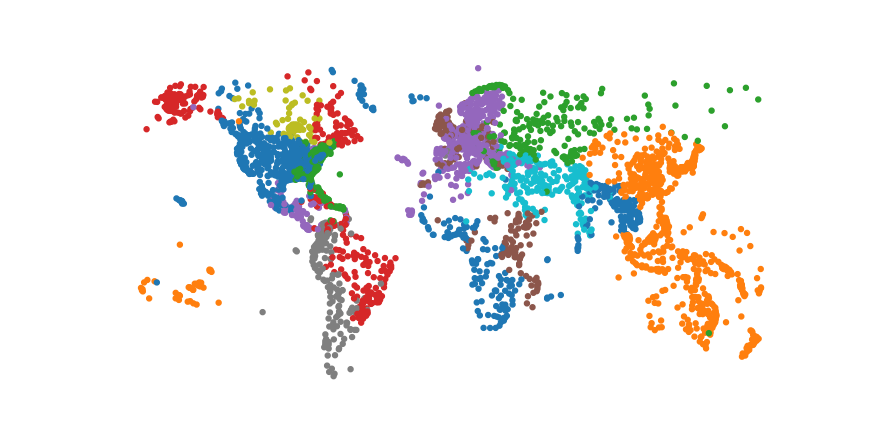

In [152]:
plt.figure(figsize=(8,4))
plt.axis('off')
show_nodes = nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = node_colors)
plt.show()

In [154]:
def get_modularity(graph,C):
    '''
    graph: networkx graph
        undirected graph (possibly weighted)
    C: dictionary
        cluster of each node
        
    Returns: float
        modularity
    '''
    
    # add weights if none
    if nx.get_edge_attributes(graph,'weight') == {}:
        for u,v in graph.edges():
            graph[u][v]['weight'] = 1
            
    clusters = set(C.values())
    cluster_weight = {k: 0 for k in clusters}
    cluster_volume = {k: 0 for k in clusters}
    Q = 0
    
    node_weight = {u: 0. for u in graph.nodes()}
    w = 0
    for u,v in graph.edges():
        node_weight[u] += graph[u][v]['weight']
        node_weight[v] += graph[u][v]['weight']
        w += graph[u][v]['weight']
    
    v = 2 * w
    
    weights = nx.get_edge_attributes(graph,'weight')
    
    for node in graph:
        cluster_volume[C[node]] += node_weight[node]
    
    for edge in graph.edges:
        c = C[edge[0]]
        if c != C[edge[1]]:
            continue
        
        cluster_weight[c] += weights[edge]
    

    return sum([w_k/w for w_k in cluster_weight.values()]) - sum([v_k**2/(v**2) for v_k in cluster_volume.values()])

print("Modularity of this clustering :", get_modularity(openflights, C))

Modularity of this clustering : 0.523534749075834


There is another algorithm for clustering that can take a specified number of cluster : Hierarchical clustering.
We could use either the Agglomerative algorithm or the nearest-neighbor chain.
They both consist in merging the nearest neighbors in graph (according to some distance) recursively until there is only one node/cluster left in the graph.

In [164]:
def get_nearest_nodes(graph):
    '''
    graph: networkx graph
        undirected, connected graph with edge and node weights
        
    Returns: 
        i,j: int
            nodes to be merged
        dist: float 
            distance between i,j, given by w_i * w_j / A_ij
    '''    
    min_dist = np.inf
    i_ = 0
    j_ = 0
    for i,j in graph.edges():
        if i != j:
            dist = graph.nodes[i]['weight'] * graph.nodes[j]['weight'] / graph[i][j]['weight'] 
            if dist < min_dist:
                min_dist = dist
                i_ = i
                j_ = j
    i,j,dist = i_,j_,min_dist
    return i,j,dist


def merge_nodes(graph, i, j, ij):
    '''
    graph: networkx graph
        undirected graph with edge and node weights
    i,j: nodes
        nodes to be merged
    ij: node
        new node index
    '''    
    neighbors = set(graph.neighbors(i)) - {i,j}
    for k in neighbors:
        if graph.has_edge(ij,k):
            graph[ij][k]['weight'] += graph[i][k]['weight']
        else:
            graph.add_edge(ij,k,weight = graph[i][k]['weight'])
    neighbors = set(graph.neighbors(j)) - {i,j}
    for k in neighbors:
        if graph.has_edge(ij,k):
            graph[ij][k]['weight'] += graph[j][k]['weight']
        else:
            graph.add_edge(ij,k,weight = graph[j][k]['weight'])   
    graph.add_edge(ij,ij, weight = 0)
    if graph.has_edge(i,i):
        graph[ij][ij]['weight'] += graph[i][i]['weight']
    if graph.has_edge(j,j):
        graph[ij][ij]['weight'] += graph[j][j]['weight']
    if graph.has_edge(i,j):
        graph[ij][ij]['weight'] += graph[i][j]['weight'] 
        
    graph.nodes[ij]['weight'] = graph.nodes[i]['weight'] + graph.nodes[j]['weight']
    graph.remove_nodes_from([i,j])
    
def basic_hierarchical_clustering(graph):
    '''
    graph: networkx graph
        undirected, connected graph 
        
    Returns: np array
        dendrogram
    '''        
    dendrogram = []
    
    nodes = list(graph.nodes())
    node_index = {u:i for i,u in enumerate(graph)}
    aggregate_graph = nx.relabel_nodes(graph, node_index)
    
    if nx.get_edge_attributes(aggregate_graph,'weight') == {}:
        for i,j in aggregate_graph.edges():
            aggregate_graph[i][j]['weight'] = 1
    
    for i in aggregate_graph.nodes():
        aggregate_graph.nodes[i]['size'] = 1
        aggregate_graph.nodes[i]['weight'] = 0

    v = 0
    for i,j in aggregate_graph.edges():
        aggregate_graph.nodes[i]['weight'] += aggregate_graph[i][j]['weight']
        aggregate_graph.nodes[j]['weight'] += aggregate_graph[i][j]['weight']
        v += 2 * aggregate_graph[i][j]['weight']
        
    n = aggregate_graph.number_of_nodes()
    for t in range(n - 1):
        i, j, dist = get_nearest_nodes(aggregate_graph)
        size = aggregate_graph.nodes[i]['size'] + aggregate_graph.nodes[j]['size']
        merge_nodes(aggregate_graph, i, j, n+t)
        dist /= v
        aggregate_graph.nodes[n+t]['size'] = size
        dendrogram.append([i, j, dist, size])
    return np.array(dendrogram)
    
    
# Should be faster, but doesn't work

# def hierarchical_clustering(graph):
#     '''
#     graph: networkx graph
#         undirected, connected graph 
        
#     Returns: np array
#         dendrogram
#     '''        
#     dendrogram = []        
    
#     nodes = list(graph.nodes())
#     mapping = {u: i for i,u in enumerate(graph.nodes())}
#     aggregate_graph = nx.relabel_nodes(graph, mapping)
    
#     if nx.get_edge_attributes(aggregate_graph,'weight') == {}:
#         for i,j in aggregate_graph.edges():
#             aggregate_graph[i][j]['weight'] = 1
    
#     for i in aggregate_graph.nodes():
#         aggregate_graph.nodes[i]['size'] = 1
#         aggregate_graph.nodes[i]['weight'] = 0
        
#     v = 0
#     for i,j in aggregate_graph.edges():
#         aggregate_graph.nodes[i]['weight'] += aggregate_graph[i][j]['weight']
#         aggregate_graph.nodes[j]['weight'] += aggregate_graph[i][j]['weight']
#         v += 2 * aggregate_graph[i][j]['weight']
    
#     nodes = list(aggregate_graph.nodes())
#     n = len(nodes)
#     next_index = n
    
#     while n > 1:
#         chain = [nodes[0]]
#         while chain:
#             i = chain.pop()
#             neighbors = set(aggregate_graph.neighbors(i)) - {i}
#             min_dist = np.inf
#             nearest_neighbor = None
#             for j in neighbors:
#                 dist = aggregate_graph.nodes[i]['weight'] * aggregate_graph.nodes[j]['weight'] / v 
#                 / aggregate_graph[i][j]['weight'] 
#                 if dist < min_dist:
#                     nearest_neighbor = j
#                     min_dist = dist
#                 elif dist == min_dist:
#                     nearest_neighbor = min(j, nearest_neighbor)
#             dist = min_dist
#             j = nearest_neighbor
#             if chain:
#                 k = chain.pop()
#                 if k == j:
#                     size = aggregate_graph.nodes[i]['size'] + aggregate_graph.nodes[j]['size']
#                     merge_nodes(aggregate_graph, i, j, next_index)
#                     aggregate_graph.nodes[next_index]['size'] = size
#                     dendrogram.append([i,j,dist,size])
#                     next_index += 1
#                 else:
#                     chain.append(k)
#                     chain.append(i)
#                     chain.append(j)
#             else:
#                 chain.append(i)
#                 chain.append(j)
#         nodes = list(aggregate_graph.nodes())
#         n = len(nodes)
    
#     dendrogram = np.array(dendrogram)
#     return dendrogram

In [159]:
def extract_clusters(nodes, dendrogram, nb_clusters):
    '''
    nodes: list 
        list of nodes 
    dendrogram: np array
        dendrogram
    nb_clusters: int
        target number of clusters
        
    Returns: dict 
        cluster of each node
    '''    
    
    n = dendrogram.shape[0] + 1
    cluster = {i: [i] for i in range(n)}
    for t in range(n - nb_clusters):
        i = dendrogram[t][0]
        j = dendrogram[t][1]
        cluster[n+t] = cluster[i] + cluster[j]
    
    clusters = list(cluster.values())
    # reindexing nodes and clusters
    C = {nodes[i]: k for k,c in enumerate(clusters) for i in c}
    return C

In [165]:
# dendrogram = hierarchical_clustering(openflights)

## TAKE SOME TIME
dendrogram = basic_hierarchical_clustering(openflights)
C = extract_clusters(list(openflights.nodes), dendrogram, 20)

In [166]:
print("Modularity of this clustering :", get_modularity(openflights, C))

Modularity of this clustering : 0.5645614541641684


<IPython.core.display.Javascript object>


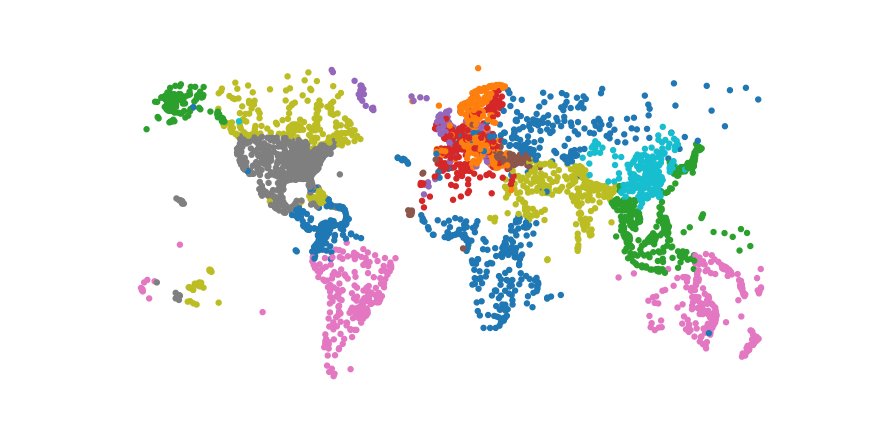

In [167]:
node_colors = [colors[C[u] % len(colors)] for u in openflights.nodes()]

plt.figure(figsize=(8,4))
plt.axis('off')
show_nodes = nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = node_colors)
plt.show()